# 学习形状识别


## 目标

* 了解图像轮廓
* 学习如何绘制轮廓和包围框
* 学习矩特征

## 01. 知识点


### 1.1 图像轮廓

什么叫轮廓，轮廓是一系列相连的点组成的曲线，代表了物体的基本外形。它和前面学习的边缘很像，但又有不同。简单的说，轮廓是连续的，边缘并不全都连续，可以通过边缘检测的图中看出。其实边缘主要是作为图像的特征使用，比如可以用边缘特征可以区分脸和手，而轮廓主要用来分析物体的形态，比如物体的周长和面积等，可以说边缘包括轮廓。

寻找轮廓的操作一般用于二值化图，所以通常会使用阈值分割或Canny边缘检测先得到二值图。

需要注意的是寻找轮廓是针对白色物体的，一定要保证物体是白色，而背景是黑色，不然很多人在寻找轮廓时会找到图片最外面的一个框。

轮廓的层次，比如下图。相当于有3个轮廓0和1是最外层轮廓属于同级轮廓，2是内层轮廓属于第1轮廓。关系就是第0轮廓的下一个轮廓是第1轮廓，它没有前一个轮廓也没有子轮廓和父轮廓，在findContours返回的hierarchy里会表示成\[1,-1,-1,-1\]它的格式是\[next,previous,firstchild,parent\]意思就是\[下一个轮廓，前一个轮廓，子轮廓，父轮廓\]，同理表示第1轮廓会是\[-1,0,2,-1\]即没有下一个轮廓，前一个轮廓是0，子轮廓是2，没有父轮廓。则第2轮廓会就\[-1,-1,-1,1\]。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter6_1.png"  width="200" height="200" ></div>
<div style="float:none;clear:both;"></div> 


### 矩特征

矩函数在图像分析中有着广泛的应用，如模式识别、目标分类、目标识别与方位估计、图像的编码与重构等。从一幅图像计算出来的矩集，不仅可以描述图像形状的全局特征，而且可以提供大量关于该图像不同的几何特征信息，如大小，位置、方向和形状等。图像矩这种描述能力广泛应用于各种图像处理、计算机视觉和机器人技术领域的目标识别与方位估计中。

OpenCV中的矩主要包括以下几种：空间矩，中心矩和中心归一化矩。空间矩的实质为面积或者质量。中心矩体现的是图像强度的最大和最小方向。归一化矩具有尺度、旋转、平移不变性，可以用来做匹配， 由归一化矩组成的特征量对图片进行识别，优点就是速度很快，缺点是识别率比较低。一般用来识别图像中大的物体，对于物体的形状描述得比较好，图像的纹理特征不能太复杂，像识别水果的形状，或者对于车牌中的简单字符的识别效果会相对好一些。



## 02 轮廓识别

### 2.1 画轮廓

在OpenCV中查找图像轮廓使用方法**findContours，方法原型为cv2.findContours(image, mode, method)**。

公式中返回值对与OpenCV2和OpenCV4返回两个contours和hierarchy，OpenCV3返回三个image，contours和hierarchy。我们使用的是OpenCV2所以使用两个返回值。contours为返回的轮廓，hierarchy为轮廓的层次信息。

公式中的第一个参数image为原始图像。实际操作是，需要使用阈值处理，边缘检测等方法将图像处理为二值图像。第二个参数mode为轮廓检索模式，cv2.RETR_LIST对检测的轮廓不建立等级关系，cv2.RETR_EXTERNAL只检测外轮廓，cv2.RETR_CCOMP检测所有轮廓并组织成两级层次结构，cv2.RETR_TREE建立一个等级树结构的轮廓。第三个参数method为轮廓的近似方法，cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max(abs(x1-x2),abs(y2-y1==1。cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息。cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法。

绘制轮廓我们使用**drawContours方法。方法原型为cv2.drawContours(image, contours, contourIdx, color\[, thickness\[, lineType\[, hierarchy\[, maxLevel\[, offset \]\]\]\]\])**。

方法的返回值为image表示图像，即绘制了边缘的图像。方法的参数1image为要绘制轮廓的图像。此方法会在图像上直接绘制轮廓，所以通常是复制一份原图做为这个参数。参数2contours为需要绘制的轮廓也就是findContours返回的轮廓。参数3contourIdx需要绘制边缘的索引，即可以指定绘制某一条轮廓，-1为绘制所有轮廓。参数4color为绘制的颜色格式为BGR。参数5以后都是可选参数，thickness为画笔的粗细。参数6lineType为线型。参数7hierarchy对应findContours返回的hierarchy。参数8maxLevel为控制所绘制的轮廓层次的深度。参数9offset为偏移参数。通常这些可选参数不用赋值。



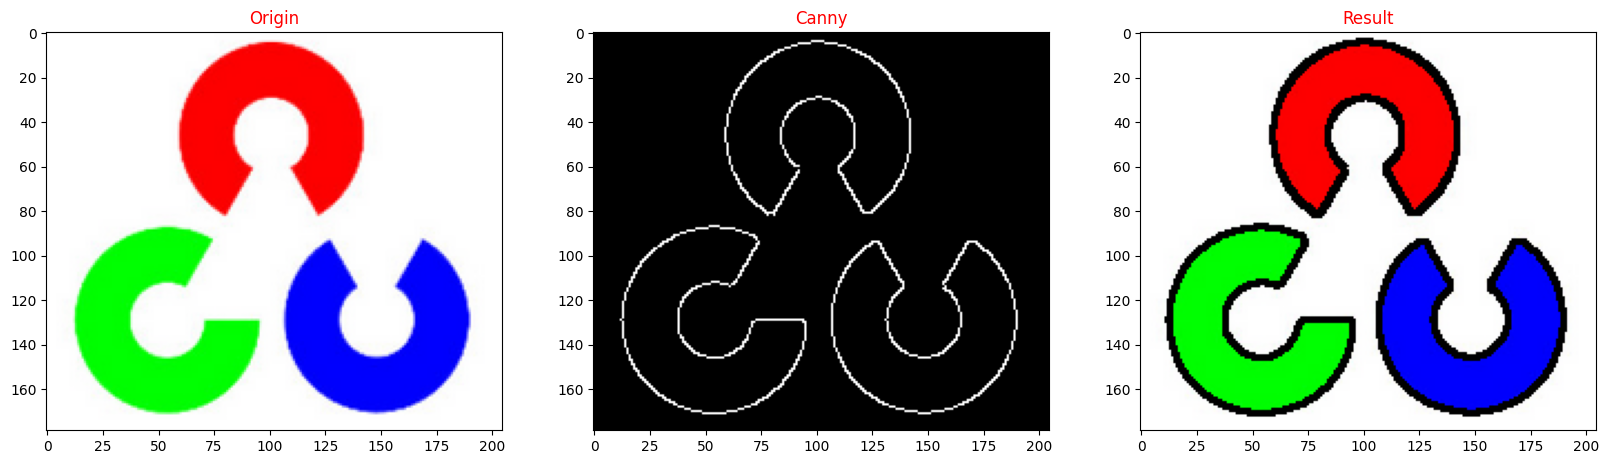

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic5.png")

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(131)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
ga3 = cv2. GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(ga3, 50, 200)
equal = cv2.cvtColor(canny,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(132)
ax2.set_title('Canny',fontsize=12,color='r')
ax2.imshow(equal)

contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image,contours,-1,(0,0,0),2)

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(133)
ax3.set_title('Result',fontsize=12,color='r')
ax3.imshow(equal)


### 2.2 绘制矩形包围框

有的时候我们不想绘制目标图像，希望能用一个矩形框把它框起来。这时我们就要使用方法**boundingRect**，他可以根据轮廓返回一个矩形边界的左上角坐标和矩形框的长宽即x，y方向的长度。替换原来代码的第15行，使用boundingRect方法参数是findContours返回的轮廓之一，比如第一个轮廓contours\[0\]。

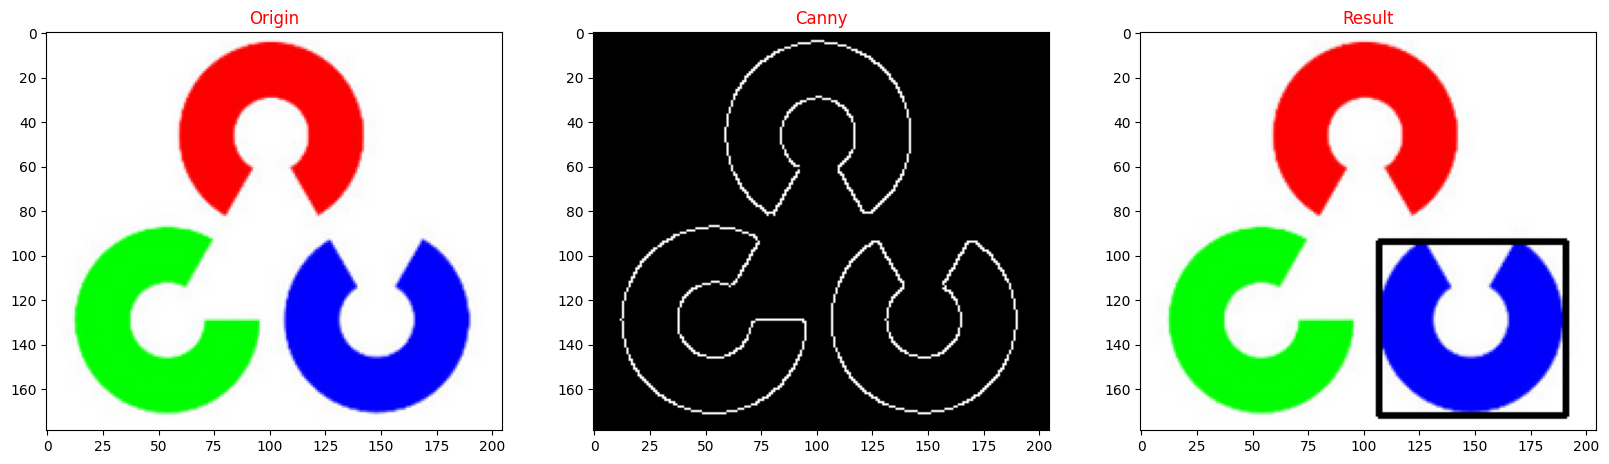

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic5.png")

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(131)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
ga3 = cv2. GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(ga3, 50, 200)
equal = cv2.cvtColor(canny,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(132)
ax2.set_title('Canny',fontsize=12,color='r')
ax2.imshow(equal)

contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)#使用rectangle方法绘制矩形。就可以完成对一个轮廓的包围框的绘制。

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(133)
ax3.set_title('Result',fontsize=12,color='r')
ax3.imshow(equal)

## 04 提取前景

提取前景就像PS里的扣图，这需要把原图处理成二值图（黑白图），再通过查找轮廓，使用此轮廓构建出掩模模板就可以实现扣图的效果。

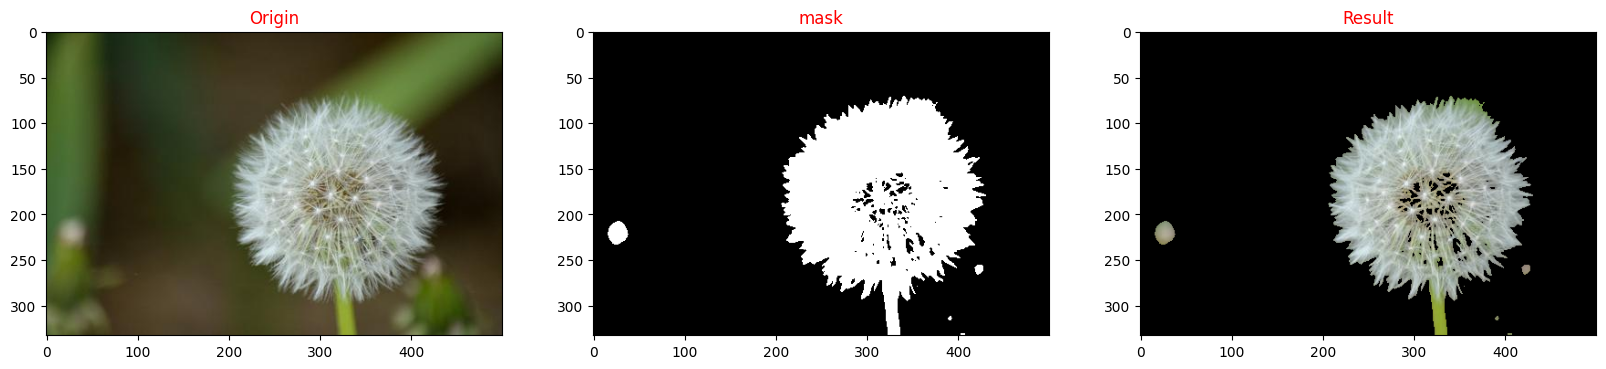

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/hua.jpeg")

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(131)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
ga3 = cv2. GaussianBlur(gray, (3, 3), 0)
ret,threshold = cv2.threshold(ga3,127,255,cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(image.shape,np.uint8)
mask = cv2.drawContours(mask,contours,-1,(255,255,255),-1)
equal = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(132)
ax2.set_title('mask',fontsize=12,color='r')
ax2.imshow(equal)

loc = cv2.bitwise_and(image,mask)
equal = cv2.cvtColor(loc,cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(133)
ax3.set_title('Result',fontsize=12,color='r')
ax3.imshow(equal)


## 05 矩的计算

OpenCV提供了方法**cv2.moments**来获取轮廓的moments特征，通常情况下，我们将使用函数cv2.moments（）获取的轮廓特征称为“轮廓矩”。该方法的语法格式为：
**retval=cv2.moments（array\[,binaryImage\]）**

式中：
 - array 可以是点集，也可以是灰度图像或者二值图像。当array是点集时，函数会把这些点集当成轮廓中的顶点，把整个点集作为一条轮廓，而不是把它们当成独立的点来看待。
 - binaryImage：该参数为True时，array内所有的非零值都被处理为1。该参数仅在参数array为图像时有效。

该方法的返回值retval是矩特征，主要包括：

1. 空间矩
  * 零阶矩：m00
  * 一阶矩：m10,m01
  * 二阶矩：m20,m11,m02
  * 三阶矩：m30,m21,m12,m03
2. 中心矩
  *  二阶中心矩：mu20,mu11,mu02
  * 三阶中心矩：mu30,mu21,mu12,mu03
3. 归一化中心矩
  * 二阶Hu矩：nu20,nu11,nu02
  * 三阶Hu矩：nu30,nu21,nu12,nu03

上述矩都是根据公式计算得到的，大多数矩比较抽象。虽然大多数矩都是通过数学公式计算得到的抽象特征，但是零阶矩“m00”的含义比较直观，它表示一个轮廓的面积。

在位置发生变化时，虽然轮廓的面积、周长等特征不变，但是更高阶的特征会随着位置的变化而发生变化。在很多情况下，我们希望比较不同位置的两个对象的一致性。解决这一问题的方法是引入中心矩。中心矩通过减去均值而获取平移不变性，因而能够比较不同位置的两个对象是否一致。很明显，中心矩具有的平移不变性，使它能够忽略两个对象的位置关系，帮助我们比较不同位置上两个对象的一致性。

除了考虑平移不变性外，我们还会考虑经过缩放后大小不一致的对象的一致性。也就是说，我们希望图像在缩放前后能够拥有一个稳定的特征值。也就是说，让图像在缩放前后具有同样的特征值。显然，中心矩不具有这个属性。例如，两个形状一致、大小不一的对象，其中心矩是有差异的。
归一化中心矩通过除以物体总尺寸而获得缩放不变性。它通过上述计算提取对象的归一化中心矩属性值，该属性值不仅具有平移不变性，还具有缩放不变性。

在OpenCV中，函数**cv2.moments（）**会同时计算上述空间矩、中心矩和归一化中心距。



轮廓：
轮廓0的矩:
 {'m00': 6241.0, 'm10': 1607057.5, 'm01': 976716.5, 'm20': 417063146.3333333, 'm11': 251504498.75, 'm02': 156101972.3333333, 'm30': 109065367823.75, 'm21': 65270382401.166664, 'm12': 40196257875.833336, 'm03': 25445906616.25, 'mu20': 3245840.0833333135, 'mu11': 0.0, 'mu02': 3245840.0833333135, 'mu30': 1.52587890625e-05, 'mu21': 5.960464477539062e-07, 'mu12': 7.62939453125e-06, 'mu03': 7.62939453125e-06, 'nu20': 0.08333333333333282, 'nu11': 0.0, 'nu02': 0.08333333333333282, 'nu30': 4.958891578152058e-15, 'nu21': 1.9370670227156476e-16, 'nu12': 2.479445789076029e-15, 'nu03': 2.479445789076029e-15}
轮廓1的矩:
 {'m00': 987.0, 'm10': 138673.5, 'm01': 119920.5, 'm20': 19519899.0, 'm11': 16848830.25, 'm02': 14752031.0, 'm30': 2752738311.75, 'm21': 2371667728.5, 'm12': 2072660355.5, 'm03': 1836522497.25, 'mu20': 36272.25, 'mu11': -3.725290298461914e-09, 'mu02': 181690.24999999814, 'mu30': 0.0, 'mu21': 9.527429938316345e-07, 'mu12': 4.991888999938965e-07, 'mu03': 2.384185791015625e-07, '

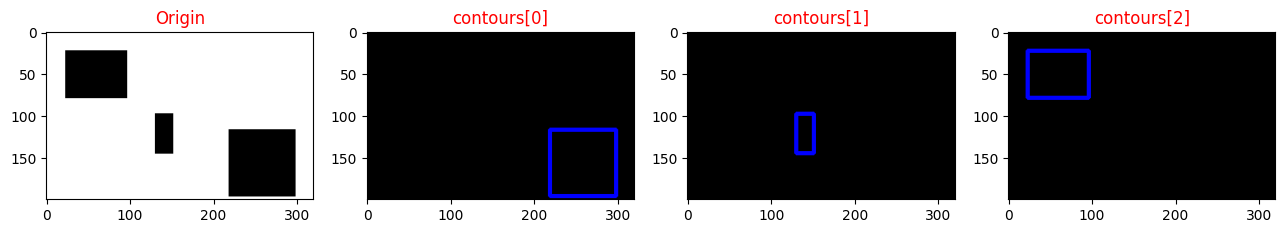

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def drawMyContour(image):
    equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(20,20), dpi=100)
    ax1 = plt.subplot(151)
    ax1.set_title('Origin',fontsize=12,color='r')
    ax1.imshow(equal)

    gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    count = len(contours)
    contoursImg = []

    for i in range(count):
        temp = np.zeros(image.shape,np.uint8)
        contoursImg.append(temp)
        contoursImg[i]=cv2.drawContours(contoursImg[i],contours,i,255,3)    
        equal = cv2.cvtColor(contoursImg[i],cv2.COLOR_BGR2RGB)
        ax2 = plt.subplot(152+i)
        ax2.set_title("contours["+str(i)+"]",fontsize=12,color='r')
        ax2.imshow(equal)

    print("轮廓：")
    for i in range(count):
        print("轮廓"+str(i)+"的矩:\n",cv2.moments(contours[i]))
    print("面积：")
    for i in range(count):
        print("轮廓"+str(i)+"的面积:%d"%cv2.moments(contours[i])['m00'])
        
image = cv2.imread("../pic/pic14.png")
drawMyContour(image)


轮廓：
轮廓0的矩:
 {'m00': 6970.0, 'm10': 460020.0, 'm01': 581995.0, 'm20': 34266843.33333333, 'm11': 38411670.0, 'm02': 52793103.33333333, 'm30': 2777140740.0, 'm21': 2861281418.3333335, 'm12': 3484344820.0, 'm03': 5109043107.5, 'mu20': 3905523.3333333284, 'mu11': 0.0, 'mu02': 4196520.833333328, 'mu30': 9.5367431640625e-07, 'mu21': 5.960464477539062e-07, 'mu12': 3.5762786865234375e-07, 'mu03': 9.5367431640625e-07, 'nu20': 0.08039215686274499, 'nu11': 0.0, 'nu02': 0.08638211382113811, 'nu30': 2.3513546698371153e-16, 'nu21': 1.469596668648197e-16, 'nu12': 8.817580011889182e-17, 'nu03': 2.3513546698371153e-16}
轮廓1的矩:
 {'m00': 6970.0, 'm10': 1491580.0, 'm01': 575025.0, 'm20': 323103643.3333333, 'm11': 123055350.0, 'm02': 51636083.33333333, 'm30': 70815743660.0, 'm21': 26656050575.0, 'm12': 11050121833.333334, 'm03': 4952402812.5, 'mu20': 3905523.3333333135, 'mu11': 0.0, 'mu02': 4196520.833333328, 'mu30': 1.52587890625e-05, 'mu21': 1.6689300537109375e-06, 'mu12': 1.6689300537109375e-06, 'mu03': 9

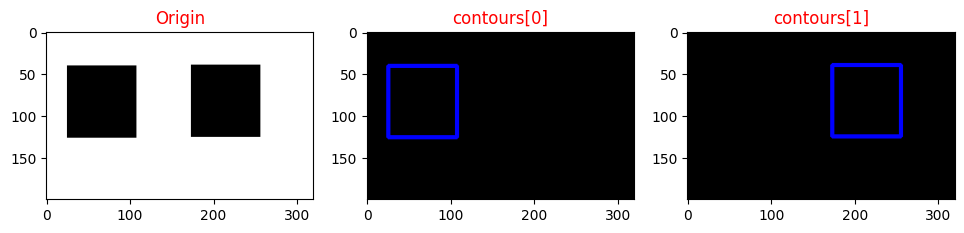

In [6]:
image = cv2.imread("../pic/pic15.png")
drawMyContour(image)

此运行的案例是两个相同的不同位置的矩形，通过返回的中心矩数据mu20,mu11,mu02的值相等可以分析出，这两个轮廓是相同的。

轮廓：
轮廓0的矩:
 {'m00': 6162.0, 'm10': 449826.0, 'm01': 409773.0, 'm20': 35961432.0, 'm11': 29913429.0, 'm02': 30454658.0, 'm30': 3081308100.0, 'm21': 2391435228.0, 'm12': 2223190034.0, 'm03': 2451466972.5, 'mu20': 3124134.0, 'mu11': 0.0, 'mu02': 3204753.5, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.08227848101265822, 'nu11': 0.0, 'nu02': 0.08440170940170941, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
面积：
轮廓0的面积:6162


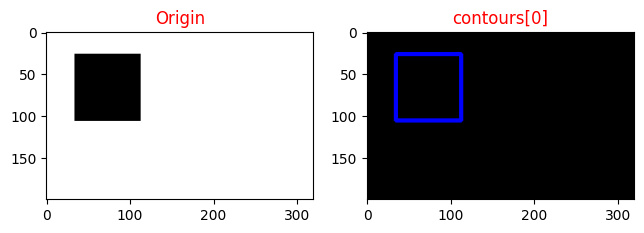

In [7]:
image = cv2.imread("../pic/pic16.png")
drawMyContour(image)

轮廓：
轮廓0的矩:
 {'m00': 1444.0, 'm10': 167504.0, 'm01': 119852.0, 'm20': 19604225.333333332, 'm11': 13902832.0, 'm02': 10121477.333333332, 'm30': 2314402768.0, 'm21': 1627150702.6666667, 'm12': 1174091370.6666667, 'm03': 868927000.0, 'mu20': 173761.3333333321, 'mu11': 0.0, 'mu02': 173761.3333333321, 'mu30': 4.76837158203125e-07, 'mu21': 1.825392246246338e-07, 'mu12': 2.2351741790771484e-07, 'mu03': 3.5762786865234375e-07, 'nu20': 0.08333333333333275, 'nu11': 0.0, 'nu02': 0.08333333333333275, 'nu30': 6.0179989547460165e-15, 'nu21': 2.3037652248637093e-15, 'nu12': 2.8209370100371954e-15, 'nu03': 4.5134992160595126e-15}
面积：
轮廓0的面积:1444


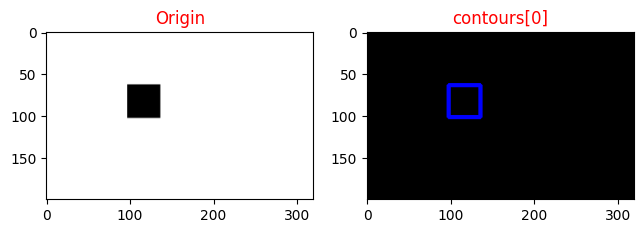

In [8]:
image = cv2.imread("../pic/pic161.png")
drawMyContour(image)

此运行的两个案例是一个等比缩放的矩形，通过返回的归一化矩数据nu20,nu11,nu02的值基本相等可以分析出，这两个轮廓是特征是相同的

## 06 计算轮廓的面积

前面我们通过轮廓矩返回的m00获取轮廓的面积，OpenCV也提供了方法cv2.contourArea来获取轮廓的面积，该方法的语法格式为：
retval=cv2.contourArea（contour\[,oriented\]））
式中：
 - contour是轮廓。
 - oriented 是布尔型值。当它为 True 时，返回的值包含正/负号，用来表示轮廓是顺时针还是逆时针的。该参数的默认值是False，表示返回的retval是一个绝对值。
 - retval 返回面积值。


轮廓0的面积:6241
轮廓1的面积:987
轮廓2的面积:4088


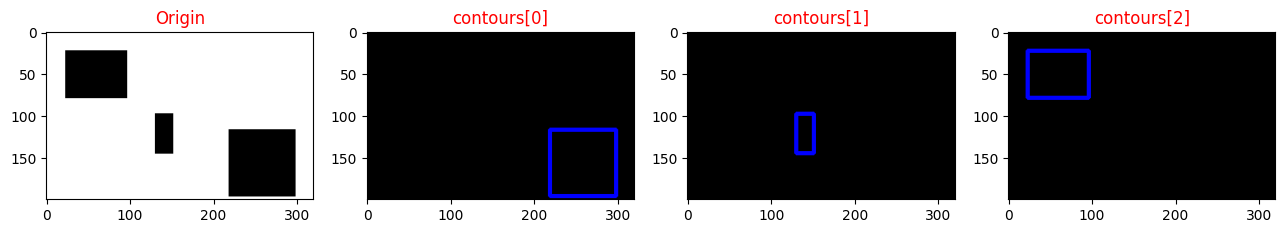

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic14.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(151)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
ret,threshold = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

count = len(contours)
contoursImg = []

for i in range(count):
    temp = np.zeros(image.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i]=cv2.drawContours(contoursImg[i],contours,i,255,3)    
    equal = cv2.cvtColor(contoursImg[i],cv2.COLOR_BGR2RGB)
    ax2 = plt.subplot(152+i)
    ax2.set_title("contours["+str(i)+"]",fontsize=12,color='r')
    ax2.imshow(equal)
    print("轮廓"+str(i)+"的面积:%d"%cv2.contourArea(contours[i]))


程序运行后左边第一个是原图，后面分别是识别出各自形状的轮廓图以及每个轮廓的的信息。打印的面积值与前面例子取m00保持一致。

## 07 计算轮廓的周长

获取轮廓的周长，OpenCV也提供了方法**cv2.arcLength**来计算轮廓的周长，该方法的语法格式为：
**retval=cv2.arcLength（curve,closed）**

式中：

 - curve是轮廓。
 - closed是布尔型值，用来表示轮廓是否是封闭的。该值为True时，表示轮廓是封闭的。
 - retval 返回轮廓的周长。
 



轮廓0的周长:316
轮廓1的周长:136
轮廓2的周长:258


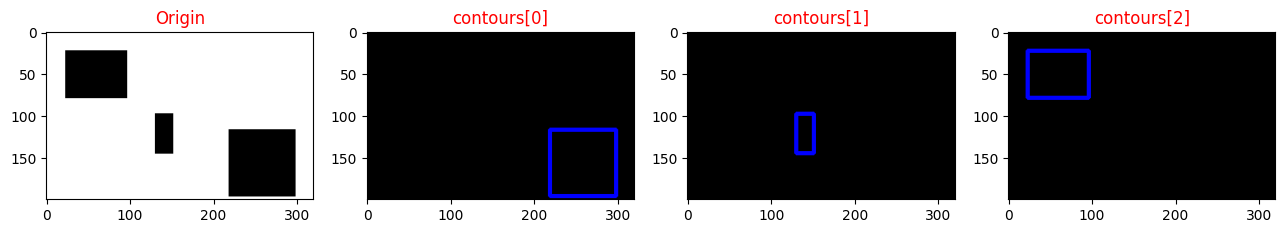

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic14.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(151)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
ret,threshold = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

count = len(contours)
contoursImg = []

for i in range(count):
    temp = np.zeros(image.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i]=cv2.drawContours(contoursImg[i],contours,i,255,3)    
    equal = cv2.cvtColor(contoursImg[i],cv2.COLOR_BGR2RGB)
    ax2 = plt.subplot(152+i)
    ax2.set_title("contours["+str(i)+"]",fontsize=12,color='r')
    ax2.imshow(equal)
    print("轮廓"+str(i)+"的周长:%d"%cv2.arcLength(contours[i],True))


## 08 Hu矩

Hu矩是归一化中心矩的线性组合。Hu矩在图像旋转、缩放、平移等操作后，仍能保持矩的不变性，所以经常会使用Hu距来识别图像的特征。
在OpenCV中，函数**cv2.HuMoments（）**的语法格式为：
**hu=cv2.HuMoments（m）**

式中返回值hu，表示返回的Hu矩值；参数m，是由函数cv2.moments（）计算得到矩特征值。


S0 Hu: [[ 2.05129403e-03]
 [ 1.57462376e-06]
 [ 1.12862729e-10]
 [ 8.87972145e-12]
 [-2.70729116e-22]
 [-6.84768057e-15]
 [ 7.56825401e-23]]


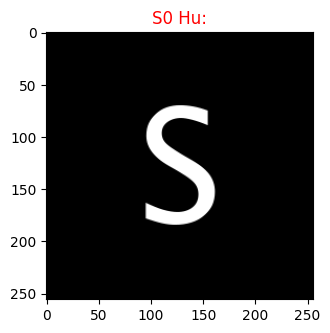

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def hu(image,name):   
    equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(20,20), dpi=100)
    ax1 = plt.subplot(151)
    ax1.set_title(name,fontsize=12,color='r')
    ax1.imshow(equal)

    gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
    huMoments1 = cv2.HuMoments(cv2.moments(threshold))
    print(name,huMoments1)


image = cv2.imread("../pic/S0.png")
hu(image,"S0 Hu")

S1 Hu [[ 2.05129403e-03]
 [ 1.57462376e-06]
 [ 1.12862729e-10]
 [ 8.87972145e-12]
 [-2.70729116e-22]
 [-6.84768057e-15]
 [ 7.56825401e-23]]


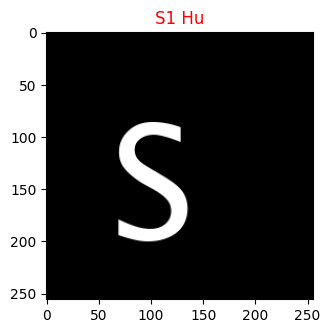

In [13]:
image = cv2.imread("../pic/S1.png")
hu(image,"S1 Hu")

S3 Hu [[ 2.02127087e-03]
 [ 1.51198042e-06]
 [ 1.12297407e-10]
 [ 8.32480362e-12]
 [-2.48776624e-22]
 [-6.55376723e-15]
 [-5.38309037e-23]]


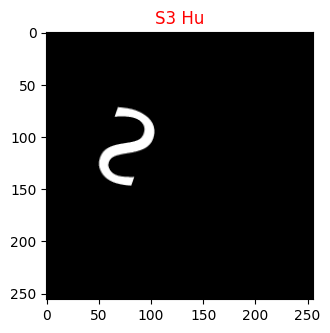

In [15]:
image = cv2.imread("../pic/S3.png")
hu(image,"S3 Hu")

程序运行后左边第一个是原图，第二个图是平移后的，第三个图做了缩放和平移。但是可以通过Hu矩返回的数据看到他们都很接近。说明他们在外观上是相似的。

## 09 形状匹配

我们可以通过Hu矩来判断两个对象的一致性。但是通过返回的Hu矩值，分析比较抽象。为了更直观的比较Hu矩值，OpenCV提供了方法**cv2.matchShapes（）**，对两个对象的Hu矩进行比较。方法**cv2.matchShapes（）**允许我们提供两个对象，对二者的Hu矩进行比较。这两个对象可以是轮廓，也可以是灰度图。在OpenCV中，函数**cv2.matchShapes（）**的语法格式为：
**retval=cv2.matchShapes（contour1,contour2,method,parameter）**
式中retval为返回值；

- contour1：第1个轮廓或者灰度图像。
- contour2：第2个轮廓或者灰度图像。
- method：比较两个对象的Hu矩的方法。 
- parameter：应用于method的特定参数，该参数为扩展参数，设置为0。


S0: (256, 256, 3)
S1: (256, 256, 3)
Match result: 2.32314167902814e-14


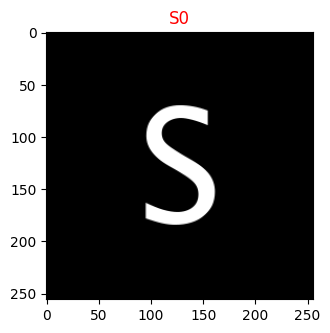

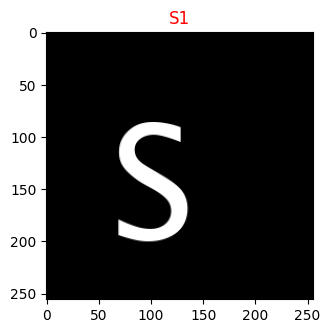

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def findMyContour(image,name):
    equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(20,20), dpi=100)
    ax1 = plt.subplot(151)
    ax1.set_title(name,fontsize=12,color='r')
    ax1.imshow(equal)

    gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    return contours

image = cv2.imread("../pic/S0.png")
print("S0:",image.shape)
contoursS0 = findMyContour(image,"S0")

image = cv2.imread("../pic/S1.png")
contoursS1 = findMyContour(image,"S1")
print("S1:",image.shape)

print("Match result:",cv2.matchShapes(contoursS0[0],contoursS1[0],1,0.0))


程序运行后可以通过返回的结果看到两个轮廓是十分相似的。


## 10 轮廓拟合

在OpenCV中，方法**cv2.boundingRect（）**能够绘制轮廓的矩形边界，语法格式为：
**retval=cv2.boundingRect（array）**

- 返回值retval表示返回的矩形边界的左上角顶点的坐标值及矩形边界的宽度和高度。
- 参数array是灰度图像或轮廓。

该函数还可以是具有4个返回值的形式：
**x,y,w,h=cv2.boundingRect（array）**

这里的4个返回值分别表示：

- 矩形边界左上角顶点的x坐标。
- 矩形边界左上角顶点的y坐标。
- 矩形边界的x方向的长度。
- 矩形边界的y方向的长度。


在OpenCV中，方法**cv2.minAreaRect（）**能够绘制轮廓的最小包围矩形框，语法格式为：
**retval=cv2.minAreaRect（points）**

- 返回值retval表示返回的矩形特征信息，该值的结构是（最小外接矩形的中心（x,y）,（宽度，高度），旋转角度）
- 参数points是轮廓。

需要注意，返回值retval的结构不符合方法cv2.drawContours（）的参数结构要求。因此，需要使用方法 cv2.boxPoints（）能够将上述返回值 retval 转换为符合要求的结构。方法**cv2.boxPoints（）**的语法格式是：
**points=cv2.boxPoints（box）**

式中：
- 返回值points，是能够用于方法cv2.drawContours（）参数的轮廓点。
- 参数box是函数cv2.minAreaRect（）返回值的类型的值。


在OpenCV中，方法**cv2.minEnclosingCircle（）**能够绘制一最小包围圆形，语法格式为：
**center,radius=cv2.minEnclosingCircle（points）**

- 返回值center是最小包围圆形的中心。
- 返回值radius是最小包围圆形的半径。
- 参数points是轮廓。

在OpenCV中，方法**cv2.fitEllipse（）**可以用来构造最优拟合椭圆，语法格式为：
**retval=cv2.fitEllipse（points）**

- 返回值retval是RotatedRect类型的值。这是因为该函数返回的是拟合椭圆的外接矩形，包含外接矩形的质心、宽、高、旋转角度等参数信息，这些信息正好与椭圆的中心点、轴长度、旋转角度等信息吻合。
- 参数points是轮廓。




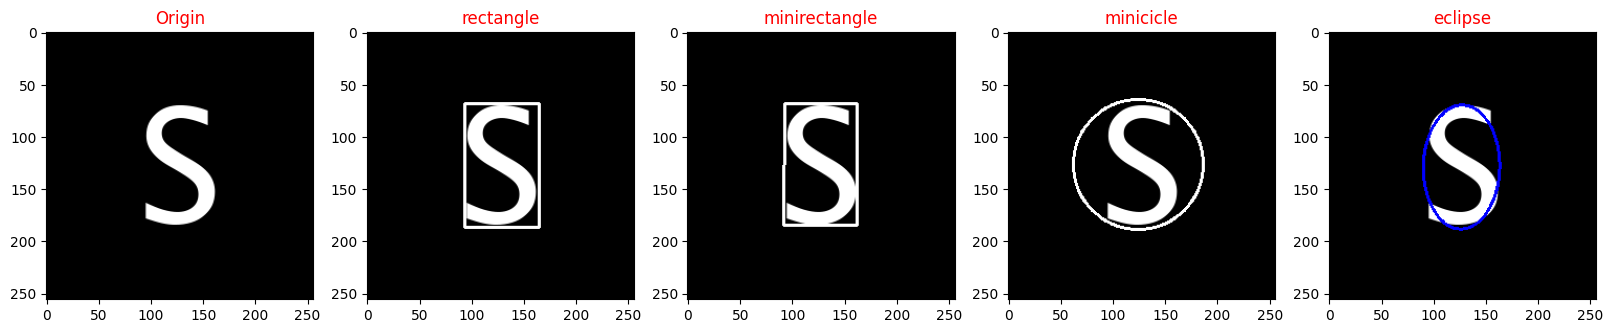

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/S0.png")

equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(151)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

gray = cv2. cvtColor(image, cv2. COLOR_BGR2GRAY)
ga3 = cv2. GaussianBlur(gray, (5, 5), 0)
contours, hierarchy = cv2.findContours(ga3, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

#矩形包围框
imageCopy = image.copy()
x,y,w,h = cv2.boundingRect(contours[0])
point = np.array([[[x,y]],[[x+w,y]],[[x+w,y+h]],[[x,y+h]]])
cv2.drawContours(imageCopy,[point],-1,(255,255,255),2)
equal = cv2.cvtColor(imageCopy,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(152)
ax2.set_title('rectangle',fontsize=12,color='r')
ax2.imshow(equal)


#最小包围框矩形
imageCopy = image.copy()
rect = cv2.minAreaRect(contours[0])
points = cv2.boxPoints(rect)
points=np.int0(points)
cv2.drawContours(imageCopy,[points],-1,(255,255,255),2)
equal = cv2.cvtColor(imageCopy,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(153)
ax2.set_title('minirectangle',fontsize=12,color='r')
ax2.imshow(equal)


#最小包围圆形
imageCopy = image.copy()
(x,y),radius = cv2.minEnclosingCircle(contours[0])
center = (int(x),int(y))
radius = int(radius)
cv2.circle(imageCopy,center,radius,(255,255,255),2)
equal = cv2.cvtColor(imageCopy,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(154)
ax2.set_title('minicicle',fontsize=12,color='r')
ax2.imshow(equal)

#最小包围椭圆
imageCopy = image.copy()
eclipse = cv2.fitEllipse(contours[0])
cv2.ellipse(imageCopy,eclipse,(255,0,0),2)
equal = cv2.cvtColor(imageCopy,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(155)
ax2.set_title('eclipse',fontsize=12,color='r')
ax2.imshow(equal)

